<a href="https://colab.research.google.com/github/rahmanziaur/rahman/blob/master/lat_vs_tp_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

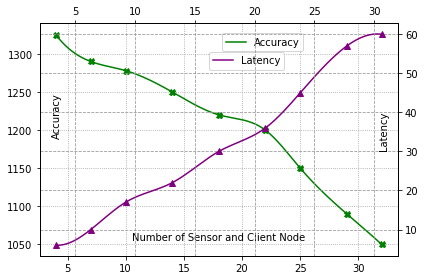

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline, BSpline
 
df = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/rahman/master/throughput.csv')
df1 = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/rahman/master/latency.csv')

fig, ax = plt.subplots()
x = df['Nodes']
y = df['Throughput']

xnew = np.linspace(x.min(), x.max(), 300) 
spl = make_interp_spline(x, y, k=3)  # type: BSpline
power_smooth = spl(xnew)

#ax.plot(xnew, power_smooth, color='tab:red', label='Throughput')
l0 = ax.plot(xnew, power_smooth, color='green',label='Accuracy')
l1 = ax.plot(x, y, 'X',color='green')
ax.legend(loc='upper right', bbox_to_anchor=(0.75, 0.98))
#ax.legend()
ax.text(3.7, 1220, 'Accuracy', va='center', rotation='vertical')
ax.text(18, 1055, 'Number of Sensor and Client Node', ha='center')
#ax.set_ylabel('Throughput (Tx/sec)')

#ax.axis([2, 34, 1035, 1340])

ax2 = ax.twinx() 
x1 = df1['Nodes']
y1 = df1['Latency']

color = 'purple'

xnew1 = np.linspace(x.min(), x.max(), 300) 
spl1 = make_interp_spline(x1, y1, k=3) 
power_smooth1 = spl1(xnew1)

#ax2.plot(xnew1, power_smooth1, color=color, label='Latency')
l2 = ax2.plot(xnew1, power_smooth1, color=color,label='Latency')
l3 = ax2.plot(x1, y1, '^',color=color)
ax2.legend(loc='upper right', bbox_to_anchor=(0.697, 0.90))
#ax2.legend()
ax2.tick_params(axis='y')

ax2.text(31.8, 35.4, 'Latency', va='center', rotation='vertical')

#ax2.grid(b=True, which='minor', color='r', linestyle='--', axis='x')

#ax2.axis([2, 34, 0, 100])

ax3 = ax.twiny() 
ax3.tick_params(axis='x')
ax3.axis([2, 32, 1035, 1340])

ax2.grid(b=True, color='#999999', linestyle='--')
ax.grid(b=True, color='#999999', linestyle=':')
# ax.grid(True)



fig.tight_layout()
#plt.yscale('log')

plt.grid(b=True, which='major', color='#999999', linestyle='--')
fig.savefig('f77.png')
plt.show()

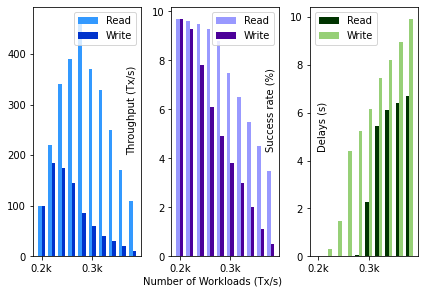

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


df_read_tp  = pd.read_csv('read-tp2.csv')
df_read_sr  = pd.read_csv('read-sr1.csv')

df_write_tp = pd.read_csv('write-tp1.csv')
df_write_sr = pd.read_csv('write-sr1.csv')

df_read_del = pd.read_csv('read_delay.csv')
df_write_del = pd.read_csv('write-del.csv')

read_label = df_read_tp['Nodes']
read_tp    = df_read_tp['Throughput']
write_tp   = df_write_tp['Throughput']

read_sr = df_read_sr['S_Rate']
write_sr = df_write_sr['S_Rate']

read_del = df_read_del['Delays']
write_del = df_write_del['Delays']



#labels = ['G1', 'G2', 'G3', 'G4', 'G5']
#men_means = [20, 34, 30, 35, 27]
#women_means = [25, 32, 34, 20, 25]

x = np.arange(len(read_label))  # the label locations
width = 0.35  # the width of the bars

#fig = plt.figure(figsize=(18,50))

# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(16, 10)

fig, ax = plt.subplots(nrows=1, ncols=3)


rects1 = ax[0].bar(x - width/2, read_tp, width, label='Read', color='#3399FF')
rects2 = ax[0].bar(x + width/2, write_tp, width, label='Write', color='#0033CC')

rects3 = ax[1].bar(x - width/2, read_sr, width, label='Read', color='#9999FF')
rects4 = ax[1].bar(x + width/2, write_sr, width, label='Write', color='#4C0099')

rects5 = ax[2].bar(x - width/2, read_del, width, label='Read', color='#003300')
rects6 = ax[2].bar(x + width/2, write_del, width, label='Write', color='#97D077')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax[0].set_ylabel('Throughput (Tx/s)')
ax[0].text(8.5, 290, 'Throughput (Tx/s)', va='center', rotation='vertical')

#ax[0].set_xlabel('No. of Nodes')
#ax.set_title('Scores by group and gender')
#ax[0].set_xticks(x)
ax[0].set_xticklabels(read_label)
ax[0].legend()

#ax[1].set_ylabel('Success rate (%)')
ax[1].text(8.5, 6, 'Success rate (%)', va='center', rotation='vertical')
#ax[1].set_xlabel('No. of Nodes')
#ax.set_title('Scores by group and gender')
#ax[1].set_xticks(x)
ax[1].set_xticklabels(read_label)
ax[1].legend()

#ax[2].set_ylabel('Delays (s)')
ax[2].text(.005, 5.4, 'Delays (s)', va='center', rotation='vertical')
#ax[2].set_xlabel('No. of Nodes')
#ax.set_title('Scores by group and gender')
#ax[1].set_xticks(x)
ax[2].set_xticklabels(read_label)
ax[2].legend()

#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()
fig.text(0.5, 0.001, 'Number of Workloads (Tx/s)', ha='center')
#fig.text(.3, .07, 'common Y', va='center', rotation='vertical')


fig.savefig('f66.png')
#plt.figure(figsize=(3,10))
plt.show()